In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [35]:
data = pd.read_csv('bai2_driving_behavior_new.csv')
print(data.head())
num_sample = data.shape[0]

   Toc_do_trung_binh_kmh  Tang_toc_trung_binh_ms2  Tan_suat_phanh_gap  \
0              57.518354                 1.408458                   0   
1              71.362831                 2.647694                   2   
2              46.790212                 1.670087                   3   
3              87.270988                 1.033623                   5   
4              75.008310                 2.836513                   6   

   So_chu_ky_sac_xa_pin  Dung_luong_pin_giam_%  
0                   189              23.648107  
1                   109              51.807058  
2                   221               8.339046  
3                   199              48.276268  
4                    55              59.634092  


In [36]:
#normalize data
speed_mean = data['Toc_do_trung_binh_kmh'].mean()
acceleration_mean = data['Tang_toc_trung_binh_ms2'].mean()
break_frequency_mean = data['Tan_suat_phanh_gap'].mean()
charge_cycle_mean = data['So_chu_ky_sac_xa_pin'].mean()
battery_capacity_decrease_mean = data['Dung_luong_pin_giam_%'].mean()

for i in range(num_sample):
    speed_total  = 0
    acceleration_total = 0
    break_frequency_total = 0
    charge_cycle_total = 0
    battery_capacity_decrease_total = 0

    speed_total += (data['Toc_do_trung_binh_kmh'][i] - speed_mean) ** 2
    acceleration_total += (data['Tang_toc_trung_binh_ms2'][i] - acceleration_mean) ** 2
    break_frequency_total += (data['Tan_suat_phanh_gap'][i] - break_frequency_mean) ** 2
    charge_cycle_total += (data['So_chu_ky_sac_xa_pin'][i] - charge_cycle_mean) ** 2
    battery_capacity_decrease_total += (data['Dung_luong_pin_giam_%'][i] - battery_capacity_decrease_mean) ** 2

    speed_std = np.sqrt(speed_total / num_sample)
    acceleration_std = np.sqrt(acceleration_total / num_sample)
    break_frequency_std = np.sqrt(break_frequency_total / num_sample)
    charge_cycle_std = np.sqrt(charge_cycle_total / num_sample)
    battery_capacity_decrease_std = np.sqrt(battery_capacity_decrease_total / num_sample)

speed_normalize = (data['Toc_do_trung_binh_kmh'] - speed_mean) / speed_std
acceleration_normalize = (data['Tang_toc_trung_binh_ms2'] - acceleration_mean) / acceleration_std
break_frequency_normalize = (data['Tan_suat_phanh_gap'] - break_frequency_mean) / break_frequency_std
charge_cycle_normalize = (data['So_chu_ky_sac_xa_pin'] - charge_cycle_mean) / charge_cycle_std
battery_capacity_decrease_normalize = (data['Dung_luong_pin_giam_%'] - battery_capacity_decrease_mean) / battery_capacity_decrease_std

data['Toc_do_trung_binh_kmh_normalize'] = speed_normalize
data['Tang_toc_trung_binh_ms2_normalize'] = acceleration_normalize
data['Tan_suat_phanh_gap_normalize'] = break_frequency_normalize
data['So_chu_ky_sac_xa_pin_normalize'] = charge_cycle_normalize
data['Dung_luong_pin_giam_%_normalize'] = battery_capacity_decrease_normalize


In [37]:
print(speed_mean, acceleration_mean, break_frequency_mean, charge_cycle_mean, battery_capacity_decrease_mean)
print(speed_std, acceleration_std, break_frequency_std, charge_cycle_std, battery_capacity_decrease_std)

75.29215221581585 1.7819100897739415 9.5688 175.0192 41.01707020215736
0.27475284298948394 0.0047481573756836355 0.048524495752145645 1.3013480063872234 0.19356576324221741


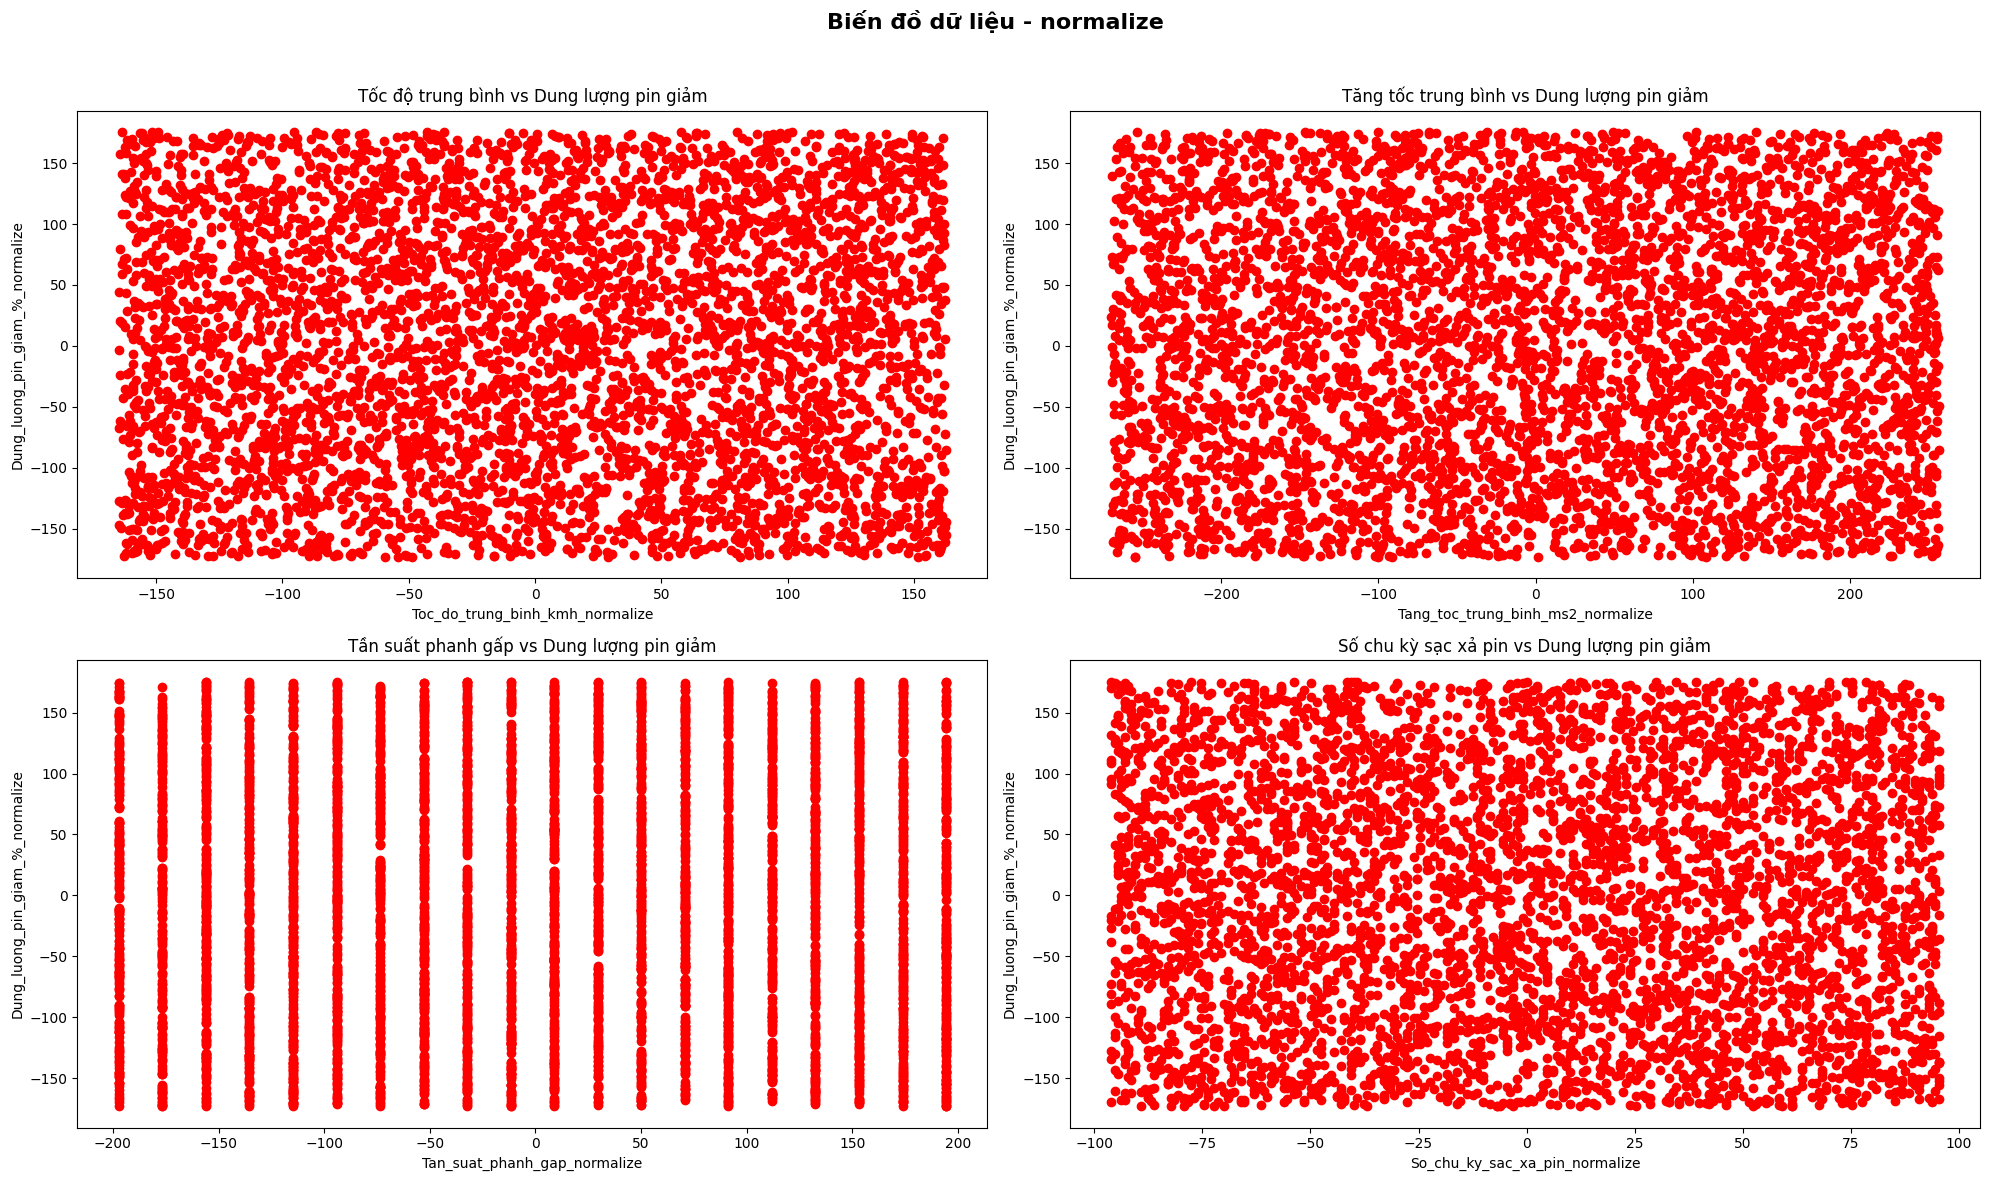

In [86]:
def plot_data(data, plot_mode='normalize'):
    fig, ax = plt.subplots(2, 2, figsize=(20, 12))
    if plot_mode == 'normalize':
        # Biểu đồ 1: Tốc độ trung bình vs. Dung lượng pin giảm
        ax[0, 0].plot(data['Toc_do_trung_binh_kmh_normalize'], data['Dung_luong_pin_giam_%_normalize'], 'ro')
        ax[0, 0].set_xlabel('Toc_do_trung_binh_kmh_normalize')
        ax[0, 0].set_ylabel('Dung_luong_pin_giam_%_normalize')
        ax[0, 0].set_title('Tốc độ trung bình vs Dung lượng pin giảm')

        # Biểu đồ 2: Tăng tốc trung bình vs. Dung lượng pin giảm
        ax[0, 1].plot(data['Tang_toc_trung_binh_ms2_normalize'], data['Dung_luong_pin_giam_%_normalize'], 'ro')
        ax[0, 1].set_xlabel('Tang_toc_trung_binh_ms2_normalize')
        ax[0, 1].set_ylabel('Dung_luong_pin_giam_%_normalize')
        ax[0, 1].set_title('Tăng tốc trung bình vs Dung lượng pin giảm')

        # Biểu đồ 3: Tần suất phanh gấp vs. Dung lượng pin giảm
        ax[1, 0].plot(data['Tan_suat_phanh_gap_normalize'], data['Dung_luong_pin_giam_%_normalize'], 'ro')
        ax[1, 0].set_xlabel('Tan_suat_phanh_gap_normalize')
        ax[1, 0].set_ylabel('Dung_luong_pin_giam_%_normalize')
        ax[1, 0].set_title('Tần suất phanh gấp vs Dung lượng pin giảm')

        # Biểu đồ 4: Số chu kỳ sạc xả pin vs. Dung lượng pin giảm
        ax[1, 1].plot(data['So_chu_ky_sac_xa_pin_normalize'], data['Dung_luong_pin_giam_%_normalize'], 'ro')
        ax[1, 1].set_xlabel('So_chu_ky_sac_xa_pin_normalize')
        ax[1, 1].set_ylabel('Dung_luong_pin_giam_%_normalize')
        ax[1, 1].set_title('Số chu kỳ sạc xả pin vs Dung lượng pin giảm')
    else:
        ax[0, 0].plot(data['Toc_do_trung_binh_kmh'], data['Dung_luong_pin_giam_%'], 'ro')
        ax[0, 0].set_xlabel('Toc_do_trung_binh_kmh')
        ax[0, 0].set_ylabel('Dung_luong_pin_giam_%')
        ax[0, 0].set_title('Tốc độ trung bình vs Dung lượng pin giảm')

        # Biểu đồ 2: Tăng tốc trung bình vs. Dung lượng pin giảm
        ax[0, 1].plot(data['Tang_toc_trung_binh_ms2'], data['Dung_luong_pin_giam_%'], 'ro')
        ax[0, 1].set_xlabel('Tang_toc_trung_binh_ms2')
        ax[0, 1].set_ylabel('Dung_luong_pin_giam_%')
        ax[0, 1].set_title('Tăng tốc trung bình vs Dung lượng pin giảm')

        # Biểu đồ 3: Tần suất phanh gấp vs. Dung lượng pin giảm
        ax[1, 0].plot(data['Tan_suat_phanh_gap'], data['Dung_luong_pin_giam_%'], 'ro')
        ax[1, 0].set_xlabel('Tan_suat_phanh_gap')
        ax[1, 0].set_ylabel('Dung_luong_pin_giam_%')
        ax[1, 0].set_title('Tần suất phanh gấp vs Dung lượng pin giảm')

        # Biểu đồ 4: Số chu kỳ sạc xả pin vs. Dung lượng pin giảm
        ax[1, 1].plot(data['So_chu_ky_sac_xa_pin'], data['Dung_luong_pin_giam_%'], 'ro')
        ax[1, 1].set_xlabel('So_chu_ky_sac_xa_pin')
        ax[1, 1].set_ylabel('Dung_luong_pin_giam_%')
        ax[1, 1].set_title('Số chu kỳ sạc xả pin vs Dung lượng pin giảm')

    plt.suptitle(f'Biến đồ dữ liệu - {plot_mode}', fontsize=16, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Điều chỉnh vị trí tiêu đề
    plt.show()

# Gọi hàm
plot_data(data, plot_mode= 'normalize')


In [ ]:
def initialize_centroids(data, k):
    indices = np.random.choice(data.shape[0], size=k, replace=False)
    centroids = data[indices]
    return centroids

def assign_clusters(data, centroids):
    clusters = []
    for i in range(data.shape[0]):
        distances = np.linalg.norm(data[i] - centroids, axis=1)
        clusters.append(np.argmin(distances))
    return np.array(clusters)

def update_centroids(data, clusters, k):
    centroids = []
    for i in range(k):
        cluster_data = data[clusters == i]
        if len(cluster_data) == 0:
            # Nếu cụm không có điểm nào, chọn lại centroid ngẫu nhiên
            centroid = data[np.random.choice(data.shape[0])]
        else:
            centroid = np.mean(cluster_data, axis=0)
        centroids.append(centroid)
    return np.array(centroids)

def kmeans(data, k):
    centroids = initialize_centroids(data, k)
    clusters = assign_clusters(data, centroids)
    while True:
        new_centroids = update_centroids(data, clusters, k)
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
        clusters = assign_clusters(data, centroids)
    return centroids, clusters



In [107]:
merge_data = data[['So_chu_ky_sac_xa_pin_normalize', 'Tan_suat_phanh_gap_normalize', 'Dung_luong_pin_giam_%_normalize']].values
k = 3
centroid, clusters = kmeans(merge_data, k)

In [108]:
def plot_kmean(data, clusters):
    fig = plt.figure(figsize=(20, 12))
    ax = fig.add_subplot(111, projection='3d')
    
    # Tạo scatter plot với màu sắc dựa trên cụm (clusters)
    scatter = ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=clusters, cmap='viridis')

    # Tạo legend dựa trên các nhóm
    legend_labels = ['Nhom A', 'Nhom B', 'Nhom C']
    unique_clusters = np.unique(clusters)
    colors = plt.cm.viridis(np.linspace(0, 1, len(unique_clusters)))

    # Sử dụng màu sắc từ colormap viridis
    handles = [plt.Line2D([0], [0], marker='o', color=colors[i], linestyle='', markersize=10) for i in range(len(unique_clusters))]
    ax.legend(handles, legend_labels, title='Cụm')

    ax.set_xlabel('So_chu_ky_sac_xa_pin_normalize')
    ax.set_ylabel('Tan_suat_phanh_gap_normalize')
    ax.set_zlabel('Dung_luong_pin_giam_%_normalize')
    plt.show()

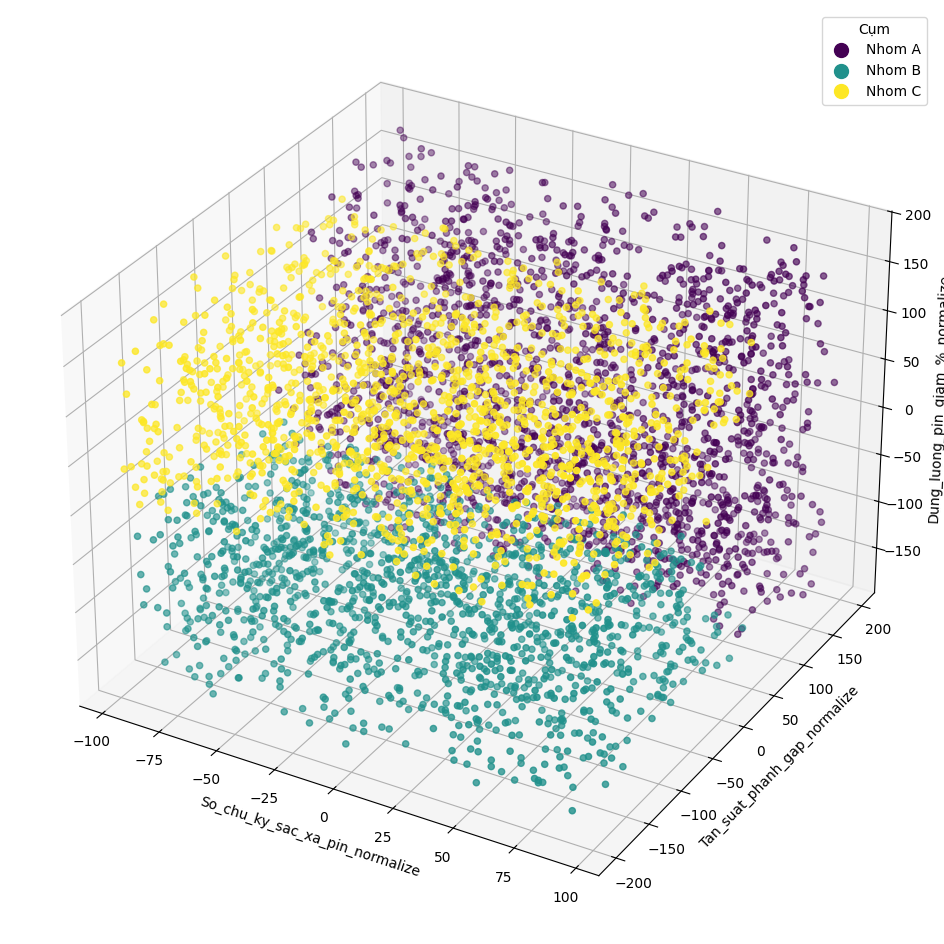

In [109]:
plot_kmean(merge_data, clusters)